In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams.update({'font.size': 20})

In [2]:
W = 7

A = np.zeros((2,2*W))
A[0,W-1] = 0.99
A[0,W]   = 0.05
A[1,2*W-1] = 1

print(A)
print(np.sum(np.abs(A),axis=1))

[[0.   0.   0.   0.   0.   0.   0.99 0.05 0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   1.  ]]
[1.04 1.  ]


In [3]:
T     = 200
sigma = 0.25

Y = np.zeros((T,2))
Y[:W,0] = [1,1,2,2,4,8,5]
Y[:W,1] = [-1,-3,1,3,0,0,0]

In [4]:
for t in range(W,T-1):
    yt = np.concatenate((Y[t:t-W:-1,0],Y[t:t-W:-1,1]))
    Y[t+1] = A.dot(yt) + np.random.randn(2)*sigma

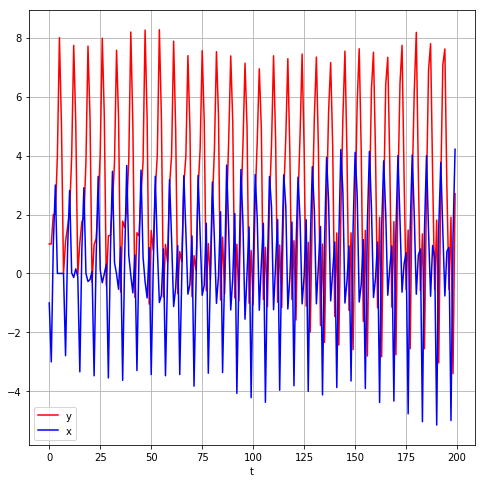

In [5]:
plt.figure(figsize=(8,8))
plt.plot(Y[:,0], color='r', label='y')
plt.plot(Y[:,1], color='b', label='x')
plt.legend()
plt.xlabel('t')
plt.grid(True)
plt.savefig('figures/vector_ts.png',dpi=300)
plt.show()

In [6]:
Ntrain = int(0.5*T)
Wtrain = 2*W

Xtrain = np.zeros((Ntrain, 2*Wtrain))
Ytrain = np.zeros((Ntrain, 2))

for i in range(Wtrain,Ntrain-1):
    Xtrain[i,:Wtrain]         = Y[i:i-Wtrain:-1,0]
    Xtrain[i,Wtrain:2*Wtrain] = Y[i:i-Wtrain:-1,1]
    Ytrain[i] = Y[i+1]
    
Ntest = T-Ntrain

Xtest = np.zeros((Ntest, 2*Wtrain))
Ytest = np.zeros((Ntest, 2))

for i in range(Ntest-1):
    j = i+Ntrain
    Xtest[i,:Wtrain]         = Y[j:j-Wtrain:-1,0]
    Xtest[i,Wtrain:2*Wtrain] = Y[j:j-Wtrain:-1,1]
    Ytest[i] = Y[j+1]

In [7]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import RandomForestRegressor

model_lasso = Lasso(fit_intercept=False, alpha=0.01)
#model_lasso = LinearRegression()
model_lasso.fit(Xtrain, Ytrain)

Lasso(alpha=0.01, copy_X=True, fit_intercept=False, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

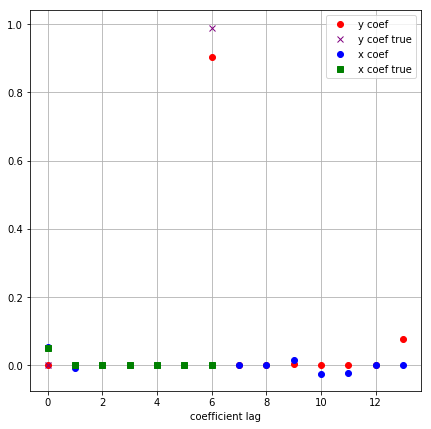

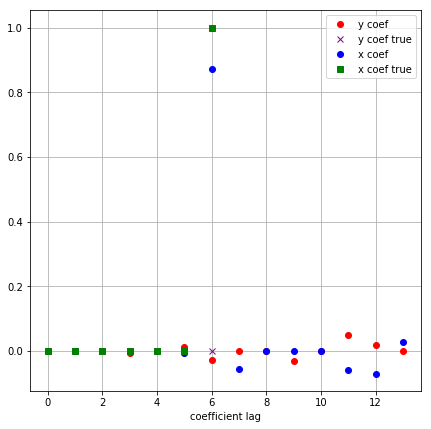

In [8]:
coefy = model_lasso.coef_[0,:Wtrain]
coefx = model_lasso.coef_[0,Wtrain:2*Wtrain]
coefy_true = A[0,:W]
coefx_true = A[0,W:]

plt.figure(figsize=(7,7))
plt.plot(coefy, color='r', linestyle='', marker='o', label='y coef')
plt.plot(coefy_true, color='purple', linestyle='', marker='x', label='y coef true')
plt.plot(coefx, color='b', linestyle='', marker='o', label='x coef')
plt.plot(coefx_true, color='g', linestyle='', marker='s', label='x coef true')
plt.legend()
plt.xlabel('coefficient lag')
plt.grid(True)
plt.savefig('figures/vector_ycoef.png',dpi=300)
plt.show()

coefy = model_lasso.coef_[1,:Wtrain]
coefx = model_lasso.coef_[1,Wtrain:2*Wtrain]
coefy_true = A[1,:W]
coefx_true = A[1,W:]

plt.figure(figsize=(7,7))
plt.plot(coefy, color='r', linestyle='', marker='o', label='y coef')
plt.plot(coefy_true, color='purple', linestyle='', marker='x', label='y coef true')
plt.plot(coefx, color='b', linestyle='', marker='o', label='x coef')
plt.plot(coefx_true, color='g', linestyle='', marker='s', label='x coef true')
plt.legend()
plt.grid(True)
plt.xlabel('coefficient lag')
plt.savefig('figures/vector_xcoef.png',dpi=300)
plt.show()

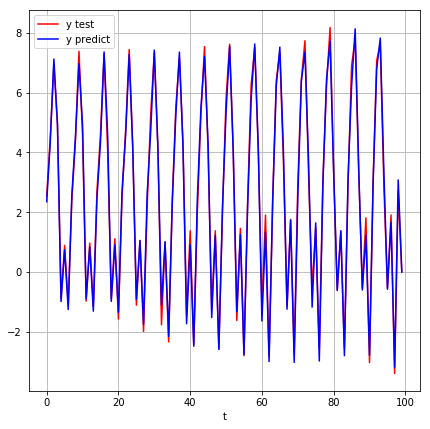

In [9]:
Yhat = model_lasso.predict(Xtest)[:,0]

plt.figure(figsize=(7,7))
plt.plot(Ytest[:,0], color='r', label='y test')
plt.plot(Yhat,  color='b', label='y predict')
plt.legend()
plt.xlabel('t')
plt.grid(True)
plt.savefig('figures/vector_test_predict.png',dpi=300)
plt.show()

In [10]:
Ntest = T-Ntrain

Xfor = np.zeros((2*Wtrain))
Yfor = np.zeros((Ntest, 2))

Yfor[:Wtrain] = Y[Ntrain-Wtrain+1:Ntrain+1]

for i in range(Wtrain, Ntest-1):

    Xfor[:Wtrain]         = Yfor[i:i-Wtrain:-1,0]
    Xfor[Wtrain:2*Wtrain] = Yfor[i:i-Wtrain:-1,1]
    
    x    = Xfor.reshape((1,2*Wtrain))
    yhat = model_lasso.predict(x)
    
    Yfor[i+1] = yhat

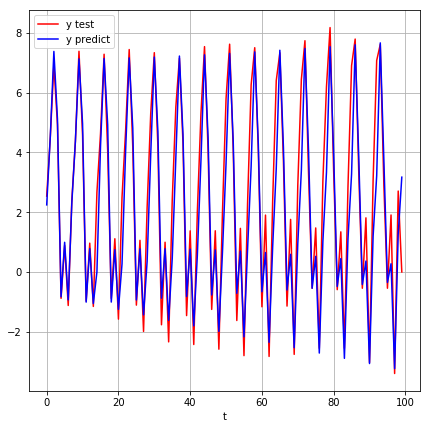

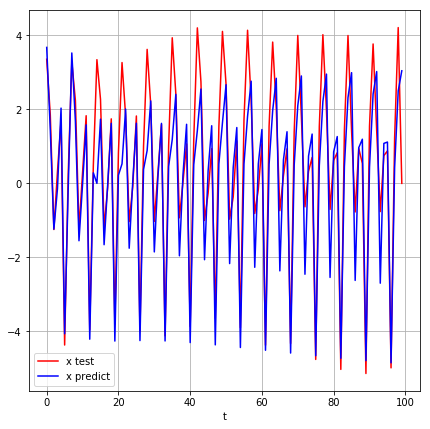

In [11]:
plt.figure(figsize=(7,7))
plt.plot(Ytest[:,0], color='r', label='y test')
plt.plot(Yfor[:,0],  color='b', label='y predict')
plt.legend()
plt.xlabel('t')
plt.grid(True)
plt.savefig('figures/vector_forecast_y.png',dpi=300)
plt.show()

plt.figure(figsize=(7,7))
plt.plot(Ytest[:,1], color='r', label='x test')
plt.plot(Yfor[:,1],  color='b', label='x predict')
plt.legend()
plt.xlabel('t')
plt.grid(True)
plt.savefig('figures/vector_forecast_x.png',dpi=300)
plt.show()